## Data
- [WHO Coronavirus (COVID-19) Dashboard](https://covid19.who.int/table)
- Our world in data: [Data on COVID-19 (coronavirus) vaccinations](https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv)
- [2021 World Population by Country](https://worldpopulationreview.com/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load vaccin data

In [2]:
vaccin = pd.read_csv("./data/vaccinations.csv")
vaccin.head(10)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,33.0,1367.0,0.003
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,NaN,38.0,1580.0,0.004
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,NaN,44.0,1794.0,0.004
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,NaN,49.0,2008.0,0.005


In [3]:
df_caccine = vaccin.groupby("location").max()
df_caccine = df_caccine[['people_vaccinated', 'total_vaccinations']]
df_caccine.head(10)

,people_vaccinated,total_vaccinations
location,,
Afghanistan,11223064.0,12202136.0
Africa,450981296.0,689216883.0
Albania,1340678.0,3011499.0
Algeria,7840131.0,15267442.0
Andorra,57901.0,154367.0
Angola,14220830.0,23173235.0
Anguilla,10852.0,24434.0
Antigua and Barbuda,64290.0,136512.0
Argentina,41365714.0,110230431.0


#### Load Covid data

In [4]:
covid = pd.read_csv("./data/WHO-COVID-19-global-table-data.csv")
covid.head(10)

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,NaN,633601048,8128.780131,1922285,24.661942,191731,6596542,84.630289,5140,0.065944,615,NaN
United States of America,Americas,96752266,29230.058000,0,0.000000,0,1064975,321.742000,0,0.000000,0,NaN
India,South-East Asia,44667967,3236.799000,3157,0.229000,656,530553,38.446000,33,0.002000,7,NaN
France,Europe,36200221,55658.945000,181395,278.900000,32756,154487,237.528000,415,0.638000,84,NaN
Germany,Europe,36180077,43503.075000,162348,195.208000,19725,156410,188.068000,92,0.111000,30,NaN
Brazil,Americas,34938073,16436.850000,60514,28.469000,14946,688764,324.034000,197,0.093000,62,NaN
Republic of Korea,Western Pacific,26462319,51614.472000,370780,723.202000,49418,29925,58.368000,354,0.690000,63,NaN
The United Kingdom,Europe,23977637,35320.442000,19000,27.988000,1749,196241,289.074000,236,0.348000,0,NaN
Italy,Europe,23823192,39943.993000,0,0.000000,0,179985,301.778000,0,0.000000,0,NaN
Japan,Western Pacific,23519801,18596.188000,563564,445.588000,0,47959,37.919000,623,0.493000,0,NaN


In [5]:
covid = covid[['WHO Region', 'Cases - newly reported in last 24 hours']]
covid = covid.rename(columns= {'WHO Region': 'Cases','Cases - newly reported in last 24 hours': 'Deaths'})
covid.head()

,Cases,Deaths
Global,633601048,6596542
United States of America,96752266,1064975
India,44667967,530553
France,36200221,154487
Germany,36180077,156410


In [6]:
covid = covid.drop(['Global']).sort_values(['Cases'], ascending=False)
df_covid = covid.iloc[0:10]
df_covid.head(10)

,Cases,Deaths
United States of America,96752266,1064975
India,44667967,530553
France,36200221,154487
Germany,36180077,156410
Brazil,34938073,688764
Republic of Korea,26462319,29925
The United Kingdom,23977637,196241
Italy,23823192,179985
Japan,23519801,47959
Russian Federation,21525567,391333


In [7]:
df_covid.index.name = 'Name'
df_covid = df_covid.rename(index={'United States of America': 'United States',
                                                   'Russian Federation': 'Russia',
                                                    'The United Kingdom': 'United Kingdom'})
df_covid.head(10)

,Cases,Deaths
Name,,
United States,96752266,1064975
India,44667967,530553
France,36200221,154487
Germany,36180077,156410
Brazil,34938073,688764
Republic of Korea,26462319,29925
United Kingdom,23977637,196241
Italy,23823192,179985
Japan,23519801,47959


### Load data 2021 World Population

In [8]:
population_21 = pd.read_csv("./data/World_Population_2021.csv")
population_21.head(10)

,cca2,name,pop2021,pop2020,pop2050,pop2030,pop2019,pop2015,pop2010,pop2000,pop1990,pop1980,pop1970,area,Density,GrowthRate,WorldPercentage,rank
0,CN,China,1444216.107,1439323.776,1402405.170,1464340.159,1433783.686,1406847.870,1368810.615,1290550.765,1176883.674,1000089.235,827601.394,9706961,148.7815,1.0034,0.1834,1
1,IN,India,1393409.038,1380004.385,1639176.033,1503642.322,1366417.754,1310152.403,1234281.170,1056575.549,873277.798,698952.844,555189.792,3287590,423.8391,1.0097,0.1769,2
2,US,United States,332915.073,331002.651,379419.102,349641.876,329064.917,320878.310,309011.475,281710.909,252120.309,229476.354,209513.341,9372610,35.5200,1.0058,0.0423,3
3,ID,Indonesia,276361.783,273523.615,330904.664,299198.430,270625.568,258383.256,241834.215,211513.823,181413.402,147447.836,114793.178,1904569,145.1046,1.0104,0.0351,4
4,PK,Pakistan,225199.937,220892.340,338013.196,262958.794,216565.318,199426.964,179424.641,142343.578,107647.921,78054.343,58142.060,881912,255.3542,1.0195,0.0286,5
5,BR,Brazil,213993.437,212559.417,228980.400,223852.122,211049.527,204471.769,195713.635,174790.340,149003.223,120694.009,95113.265,8515767,25.1291,1.0067,0.0272,6
6,NG,Nigeria,211400.708,206139.589,401315.000,262977.337,200963.599,181137.448,158503.197,122283.850,95212.450,73423.633,55982.144,923768,228.8461,1.0255,0.0268,7
7,BD,Bangladesh,166303.498,164689.383,192567.778,178993.869,163046.161,156256.276,147575.430,127657.854,103171.956,79639.491,64232.482,147570,1126.9465,1.0098,0.0211,8
8,RU,Russia,145912.025,145934.462,135824.481,143347.515,145872.256,144985.057,143479.274,146404.903,147531.561,138053.150,130148.653,17098242,8.5337,0.9998,0.0185,9
9,MX,Mexico,130262.216,128932.753,155150.818,140875.762,127575.529,121858.258,114092.963,98899.845,83943.132,67761.372,51493.565,1964375,66.3123,1.0103,0.0165,10


In [9]:
df_population_21 = population_21[['name', 'pop2021']]
df_population_21.set_index('name', inplace=True)
df_population_21

,pop2021
name,
China,1444216.107
India,1393409.038
United States,332915.073
Indonesia,276361.783
Pakistan,225199.937
...,...
Montserrat,4.977
Falkland Islands,3.533
Niue,1.619


### Merge three data and prepare data

In [10]:
data_10 = pd.merge(df_covid, df_caccine, left_index=True, right_index=True)
data_10 = data_10.merge(df_population_21, how='inner', left_index=True, right_index=True)
data_10

,Cases,Deaths,people_vaccinated,total_vaccinations,pop2021
United States,96752266,1064975,2.674763e+08,6.508103e+08,332915.073
India,44667967,530553,1.026984e+09,2.198448e+09,1393409.038
France,36200221,154487,5.460216e+07,1.514098e+08,65426.179
Germany,36180077,156410,6.481468e+07,1.890653e+08,83900.473
Brazil,34938073,688764,1.876786e+08,4.734534e+08,213993.437
United Kingdom,23977637,196241,5.381349e+07,1.512488e+08,68207.116
Italy,23823192,179985,5.085454e+07,1.424697e+08,60367.477
Japan,23519801,47959,1.043239e+08,3.359198e+08,126050.804
Russia,21525567,391333,8.612250e+07,1.811204e+08,145912.025


In [11]:
data_10['Percent_vaccin'] = data_10['people_vaccinated']/(data_10['pop2021']*10)
data_10['Cases'] = data_10['Cases']/100000
data_10['Deaths'] = data_10['Deaths']/100000
data_10

,Cases,Deaths,people_vaccinated,total_vaccinations,pop2021,Percent_vaccin
United States,967.52266,10.64975,2.674763e+08,6.508103e+08,332915.073,80.343697
India,446.67967,5.30553,1.026984e+09,2.198448e+09,1393409.038,73.702961
France,362.00221,1.54487,5.460216e+07,1.514098e+08,65426.179,83.456135
Germany,361.80077,1.56410,6.481468e+07,1.890653e+08,83900.473,77.251861
Brazil,349.38073,6.88764,1.876786e+08,4.734534e+08,213993.437,87.702993
United Kingdom,239.77637,1.96241,5.381349e+07,1.512488e+08,68207.116,78.897180
Italy,238.23192,1.79985,5.085454e+07,1.424697e+08,60367.477,84.241616
Japan,235.19801,0.47959,1.043239e+08,3.359198e+08,126050.804,82.763373
Russia,215.25567,3.91333,8.612250e+07,1.811204e+08,145912.025,59.023580


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


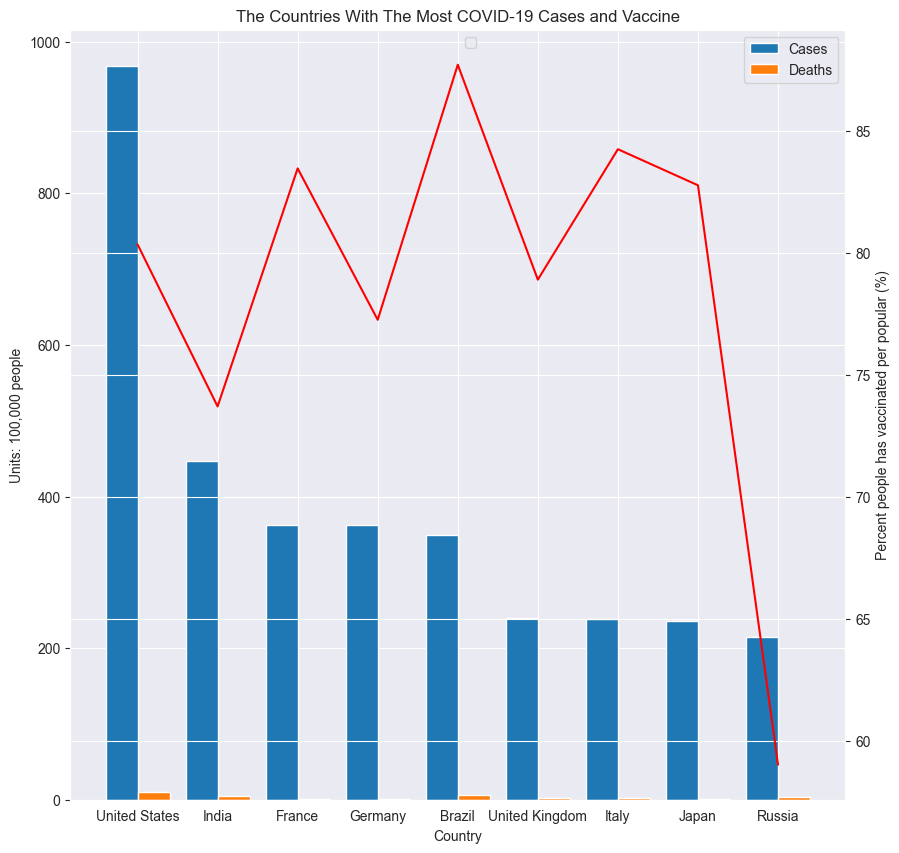

In [25]:
sns.set_style('darkgrid')
fig, ax1 = plt.subplots(figsize=(10, 10))

X = data_10.index.to_list()
X_axis = np.arange(len(X))
plt.bar(X_axis-0.2, data_10['Cases'], 0.4, label = 'Cases')
plt.bar(X_axis+0.2, data_10['Deaths'], 0.4, label = 'Deaths')
  
plt.xticks(X_axis, X)
plt.xlabel("Country")
plt.ylabel('Units: 100,000 people')
plt.title("The Countries With The Most COVID-19 Cases and Vaccine")
plt.legend()

ax2 = ax1.twinx()
plt.plot(X_axis, data_10['Percent_vaccin'], color='red')
ax2.set(ylabel='Percent people has vaccinated per popular (%)')
ax2.legend(bbox_to_anchor=(0.5, 1), loc=2)
plt.show()

#### Plot data with seaborn

In [29]:
data_10.reset_index(inplace=True)
covid_data = data_10.melt(id_vars='index', value_vars=['Cases', 'Deaths'])
covid_data.rename(columns={'index': 'Country', 'value': 'Units: 100,000 people', 'variable': 'Cases or Deaths'}, inplace=True)
covid_data

,Country,Cases or Deaths,"Units: 100,000 people"
0,United States,Cases,967.52266
1,India,Cases,446.67967
2,France,Cases,362.00221
3,Germany,Cases,361.80077
4,Brazil,Cases,349.38073
5,United Kingdom,Cases,239.77637
6,Italy,Cases,238.23192
7,Japan,Cases,235.19801
8,Russia,Cases,215.25567
9,United States,Deaths,10.64975


In [30]:
vaccine_data = data_10.melt(id_vars='index', value_vars=['Percent_vaccin'])
vaccine_data.rename(columns={'index': 'Country', 'value': 'Percentage'}, inplace=True)
vaccine_data

,Country,variable,Percentage
0,United States,Percent_vaccin,80.343697
1,India,Percent_vaccin,73.702961
2,France,Percent_vaccin,83.456135
3,Germany,Percent_vaccin,77.251861
4,Brazil,Percent_vaccin,87.702993
5,United Kingdom,Percent_vaccin,78.897180
6,Italy,Percent_vaccin,84.241616
7,Japan,Percent_vaccin,82.763373
8,Russia,Percent_vaccin,59.023580


Text(0.5, 1.0, 'The Countries With The Most COVID-19 Cases and Vaccine')

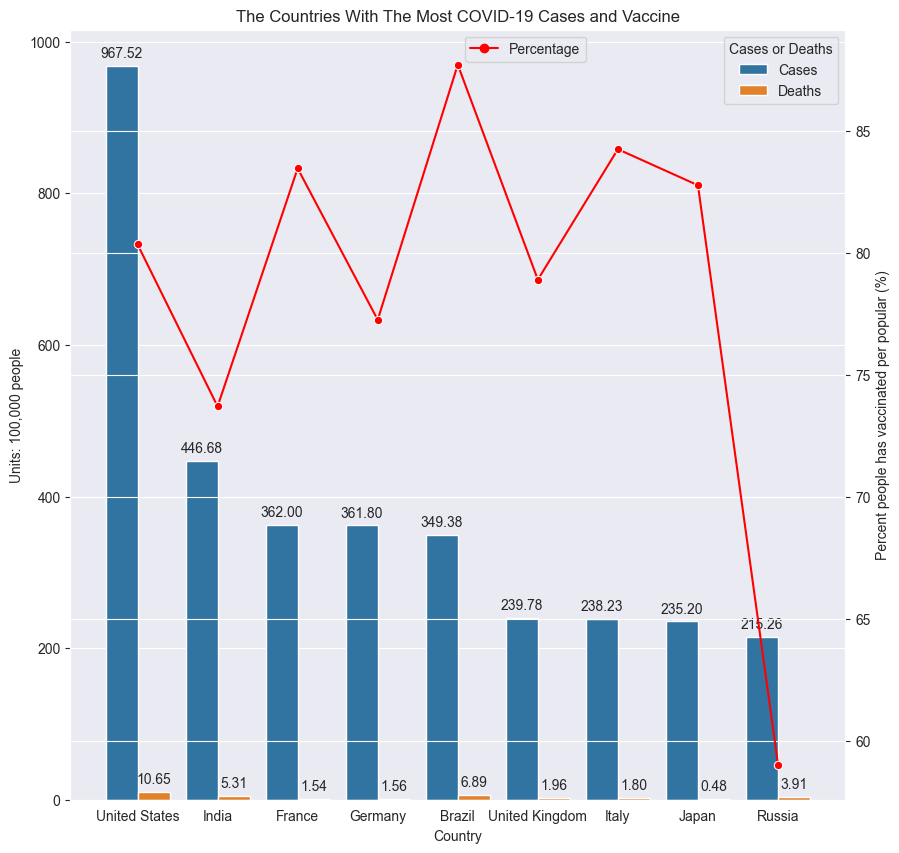

In [35]:
sns.set_style('darkgrid')
fig, ax1 = plt.subplots(figsize=(10, 10))

splot = sns.barplot(x='Country', y='Units: 100,000 people', hue='Cases or Deaths', data=covid_data, ax=ax1)
# Show value in top of bar
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x()+p.get_width()/2, p.get_height()), 
                        ha='center', va='center', xytext=(0, 9), textcoords='offset points')

ax2 = ax1.twinx()
line = sns.lineplot(data=vaccine_data, markers='o', palette=['red'], sort=False, ax=ax2)
ax2.set(ylabel='Percent people has vaccinated per popular (%)')
ax2.legend(bbox_to_anchor=(0.5, 1), loc=2)
plt.title('The Countries With The Most COVID-19 Cases and Vaccine')